# Support Vector Machines (SVM)

### Question 1:  
### Max Margin Classifier in 1D
**Let's assume two classes in 1D dimension. Class 1 : 9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14<br> <br>a) Plot these points. <br><br>b) Are they linearly separable?<br><br>c) Assume a threshold t. Points to one side of the threshold belong to class -1 and points to the other side of the threshold belong to class 1. Find the range of values of t which classifies the two classes completely. <br><br>d) Let's say y_i is the label and can take values -1 or 1. Max margin classifiers aims to find a supporting hyperplane (a boundary between the two classes) such the distance (or margin) from points belonging to either class is maximised. The points closest to the boundary on either side are termed as support vectors. Maximising the perpendicular distance from the support vectors to line will achieve the goal of max margin classifier. Our objective/cost function for the 1D case is cost = max{min(y_i(t-x_i))} where t is the threhold, y_i is the label and x_i is the data point. Plot the cost as a function of the threshold for the range of values of t found in the (c) part. <br><br>e) For what t is the cost maximum? This is the threshold that optimally classifies the two datasets. Now plot the threshold, and the two classes on a graph. Assign appropriate colours to distinguish the two classes and the threshold.<br><br>f) What are the support vectors?<br><br>g) Comment on the threshold. Is it the mid point of the two support vectors in this linearly separable 1D case?**

(a)


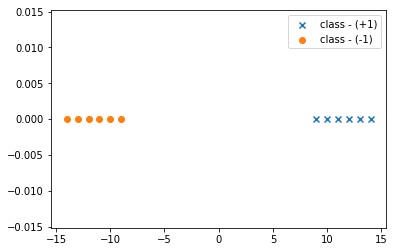


(b)
From the above plot, It is clear that the classes are linear separable

(c)
The range of values of the threshold (t) that classifies the two classes completely are:  [-9, 9]


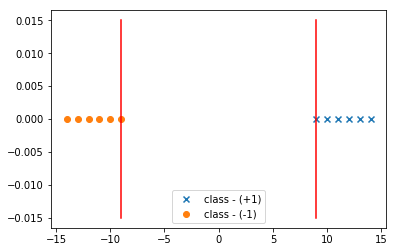


(d)


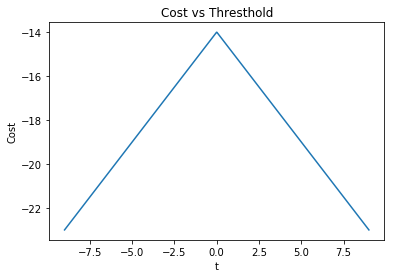


(e)
The optimal valueof the threshold is:  -0.009009009009009361


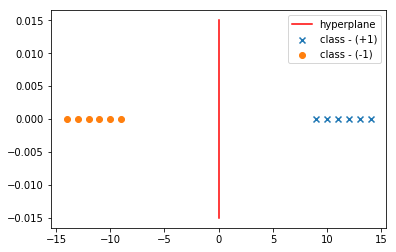


(f)
The support vectors are x = -9 and x = 9.

(g)
In this linearly separable case of 1D, the optimal hyperplane lies at the mid point of the two support vectors.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# part - (a)
# plotting the points
print('(a)')
class_1 = [9,10, 11, 12,13, 14]
class_minus_1 = [-9, -10, -11, -12, -13, -14]

plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'x', label = 'class - (+1)')
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)')
plt.legend()
plt.show()

# part - (b)
print('\n(b)')
print("From the above plot, It is clear that the classes are linear separable")

# part-(c)
print('\n(c)')
print("The range of values of the threshold (t) that classifies the two classes completely are: ", [max(class_minus_1), min(class_1)])
plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'x', label = 'class - (+1)')
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)')
plt.plot([max(class_minus_1)]*20, np.linspace(-0.015, 0.015,20), 'r')
plt.plot([min(class_1)]*20, np.linspace(-0.015, 0.015, 20), 'r')
plt.legend()
plt.show()

# part - (d)
print('\n(d)')
thres_range = np.linspace(max(class_minus_1),min(class_1), 1000)
data = class_minus_1 + class_1
data = np.transpose(np.array(data))
c_1 = [-1]* len(class_minus_1)
c_2 = [1]* len(class_1)
cl = c_1 + c_2
cl = np.transpose(np.array(cl))
data_n = np.column_stack((data, cl))
cost = np.zeros((len(thres_range)))
for i in range(len(thres_range)):
    cs = np.zeros(data_n.shape[0])
    for j in range(data_n.shape[0]):
        cs[j] = data_n[j][1] * (thres_range[i] - data_n[j][0])
    cost[i] = np.min(cs)
plt.figure()
plt.plot(thres_range, cost)
plt.title('Cost vs Thresthold')
plt.xlabel('t')
plt.ylabel('Cost')
plt.show()

# part - (e)
print('\n(e)')
optim_thresh = thres_range[np.argmax(cost)]
print("The optimal valueof the threshold is: " , optim_thresh)
plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'x', label = 'class - (+1)')
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)')
plt.plot([optim_thresh]*20, np.linspace(-0.015,0.015,20), 'r', label = 'hyperplane')
plt.legend()
plt.show()

# part - (f)
print('\n(f)')
print("The support vectors are x = {} and x = {}.".format(max(class_minus_1), min(class_1)))

#part - (g)
print('\n(g)')
print('In this linearly separable case of 1D, the optimal hyperplane lies at the mid point of the two support vectors.')

Write your final answer here.

### Question 2
### Outliers and Slack Parameter
**a) Class 1 : -6,9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14 Repeat all parts of Q1. Does the boundary shift? Is this more optimal than the classifier in Q1? You will see that there is an outlier. Will it be better to ignore the outlier so that the classifier generalizes better? <br><br> b) Class 1 : -10,9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14. Is this data linearly separable? Is there an outlier? Ignore the outlier and then report the threhold.<br><br>c) In the above cases, we allow for some error so that our data generalises better. How much of this error is permissible is captured by a slack parameter.** 

(a)


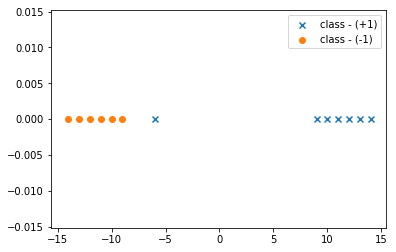


(b)
From the above plot, It is clear that the classes are linear separable

(c)
The range of values of the threshold (t) that classifies the two classes completely are:  [-9, -6]


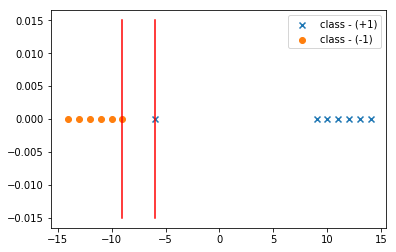


(d)


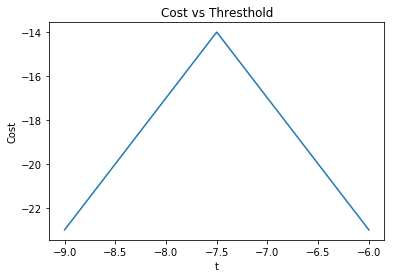


(e)
The optimal valueof the threshold is:  -7.501501501501501


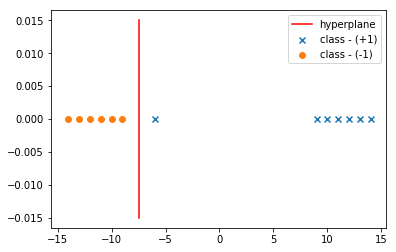


(f)
The support vectors are x = -9 and x = -6.


Yes the boundary is shifted. The obtained classifier is not optimal than the classifier in Q1 as the negative class is very close to the hyperplane than the positive class.
Yes, there exists an outlier at x = -6 and it would be a good idea to remove it and build the model for better generalization.


In [11]:
# part - (a)
# plotting the points
print('(a)')
class_1 = [-6,9,10,11,12,13,14]
class_minus_1 = [-9, -10, -11, -12, -13, -14]

plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'x', label = 'class - (+1)')
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)')
plt.legend()
plt.show()

# part - (b)
print('\n(b)')
print("From the above plot, It is clear that the classes are linear separable")

# part-(c)
print('\n(c)')
print("The range of values of the threshold (t) that classifies the two classes completely are: ", [max(class_minus_1), min(class_1)])
plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'x', label = 'class - (+1)')
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)')
plt.plot([max(class_minus_1)]*20, np.linspace(-0.015, 0.015,20), 'r')
plt.plot([min(class_1)]*20, np.linspace(-0.015, 0.015, 20), 'r')
plt.legend()
plt.show()

# part -(d)
print('\n(d)')
thres_range_2 = np.linspace(-9,-6, 1000)
data = class_minus_1 + class_1
data = np.transpose(np.array(data))
c_1 = [-1]* len(class_minus_1)
c_2 = [1]* len(class_1)
cl = c_1 + c_2
cl = np.transpose(np.array(cl))
data_n = np.column_stack((data, cl))
cost_1 = np.zeros((len(thres_range_2)))
for i in range(len(thres_range_2)):
    cs = np.zeros(data_n.shape[0])
    for j in range(data_n.shape[0]):
        cs[j] = data_n[j][1] * (thres_range[i] - data_n[j][0])
    cost_1[i] = min(cs)
plt.figure()
plt.plot(thres_range_2, cost_1)
plt.title('Cost vs Thresthold')
plt.xlabel('t')
plt.ylabel('Cost')
plt.show()

# part - (e)
print('\n(e)')
optim_thresh = thres_range_2[np.argmax(cost_1)]
print("The optimal valueof the threshold is: " , optim_thresh)
plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'x', label = 'class - (+1)')
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)')
plt.plot([optim_thresh]*20, np.linspace(-0.015,0.015,20), 'r', label = 'hyperplane')
plt.legend()
plt.show()

# part - (f)
print('\n(f)')
print("The support vectors are x = {} and x = {}.".format(max(class_minus_1), min(class_1)))
print('\n')
print("Yes the boundary is shifted. The obtained classifier is not optimal than the classifier in Q1 as the negative class is very close to the hyperplane than the positive class.")
print("Yes, there exists an outlier at x = -6 and it would be a good idea to remove it and build the model for better generalization.")




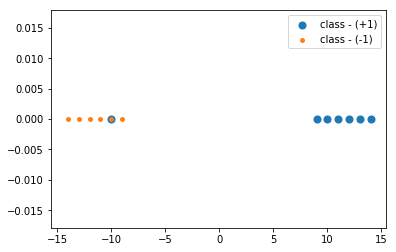

NO, the data is not linearly separable as swe can see from the above plot.
Yes, there is an outlier at x = -10

The threshold after removing the outlier is : 
The optimal valueof the threshold is:  -0.009009009009009361


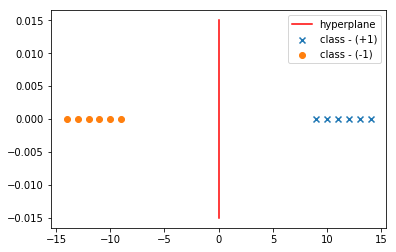

In [24]:
# part -b
class_1 = [-10,9,10,11,12,13,14]
class_minus_1 = [-9, -10, -11, -12, -13, -14]

# visualizing the data
plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'o', label = 'class - (+1)', s = 50)
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)', s = 15)
plt.legend()
plt.show()

print("NO, the data is not linearly separable as swe can see from the above plot.")
print("Yes, there is an outlier at x = -10")
print("\nThe threshold after removing the outlier is : ")

class_1 = [9,10,11,12,13,14]
optim_thresh = thres_range[np.argmax(cost)]
print("The optimal valueof the threshold is: " , optim_thresh)
plt.figure()
plt.scatter(class_1, [0]*len(class_1), marker = 'x', label = 'class - (+1)')
plt.scatter(class_minus_1, [0]*len(class_minus_1), marker = 'o', label = 'class - (-1)')
plt.plot([optim_thresh]*20, np.linspace(-0.015,0.015,20), 'r', label = 'hyperplane')
plt.legend()
plt.show()

Write your final answer here.

#### Question 3 : 
### SVM in 2D
**Using sklearn, visualise the data points and plot the decision boundary for the following 2D datapoints, into 2 classes. Also mention the support vectors for each case. Use sklearn's SVC implementation with 'linear' kernel and default C. <br> <br>
(a)  Class 1 - (-1,-2), (1,1), (1.5, 1.5), (-2,-1), (0,0), (1,-0.5) <br> Class 2 - (4.1,5.2), (6,8), (4,4), (7,8), (4.5,6), (5.5,6)**


The support vectors are: 
 [[1.5 1.5]
 [4.  4. ]]


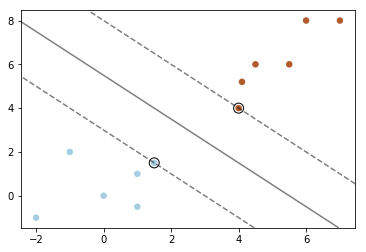

In [56]:
from sklearn.svm import SVC
class_1 = np.array([[-1,2,1],[1,1,1], [1.5,1.5,1], [-2,-1, 1], [0,0,1], [1, -0.5, 1]])
class_2 = np.array([[4.1,5.2,2], [6,8,2], [4,4,2], [7,8,2], [4.5,6,2],[5.5,6,2]])

X = np.concatenate((class_1[:,:2], class_2[:,:2]))
y = np.concatenate((class_1[:,2], class_2[:,2]))
svm_cl = SVC(kernel= 'linear')
svm_cl.fit(X, y)

print("The support vectors are: \n", svm_cl.support_vectors_)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_cl.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_cl.support_vectors_[:, 0], svm_cl.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**(b) Now add the point (3.4,2.3) to Class 0 from part (a), and classify into Class0 and Class1 again.**

The support vectors are: 
 [[3.4 2.3]
 [4.  4. ]]


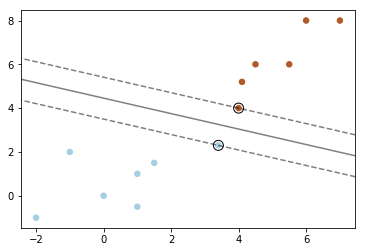

In [53]:
class_1 = np.array([[-1,2,1],[1,1,1], [1.5,1.5,1], [-2,-1, 1], [0,0,1], [1, -0.5, 1], [3.4, 2.3, 1]])
X = np.concatenate((class_1[:,:2], class_2[:,:2]))
y = np.concatenate((class_1[:,2], class_2[:,2]))
svm_cl = SVC(kernel= 'linear')
svm_cl.fit(X, y)

print("The support vectors are: \n", svm_cl.support_vectors_)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_cl.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_cl.support_vectors_[:, 0], svm_cl.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**c) Now add the point (4.5,4.5) to Class0 in part (a) and classify into classes 0 and 1 again. <br>  Comment on whether it is possible to perfectly classify these points using a linear classifier in 2D.**

The support vectors are: 
 [[1.5 1.5]
 [4.5 4.5]
 [4.1 5.2]
 [4.  4. ]]


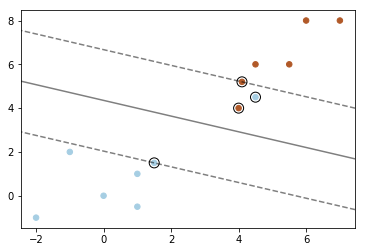

No, it is not possible to completely classify the points using a linear classifier. In order to perfectly classify a non-linear classifier is required.


In [60]:
class_1 = np.array([[-1,2,1],[1,1,1], [1.5,1.5,1], [-2,-1, 1], [0,0,1], [1, -0.5, 1], [4.5, 4.5, 1]])
X = np.concatenate((class_1[:,:2], class_2[:,:2]))
y = np.concatenate((class_1[:,2], class_2[:,2]))
svm_cl = SVC(kernel= 'linear')
svm_cl.fit(X, y)

print("The support vectors are: \n", svm_cl.support_vectors_)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_cl.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_cl.support_vectors_[:, 0], svm_cl.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

print("No, it is not possible to completely classify the points using a linear classifier. In order to perfectly classify a non-linear classifier is required.")

### Change of support vectors
**(d) How did the addition of one point in (b) and (c) affect the separating plane in (a)?**

The addition of a point to class-1 has reduced the margin and altered the slope of the decision boundary in part -(b) but still the data is linearly separable. In (c), the data point introduced removes the linear separability of the data and scikit learn SVM classsifier fits the optimal linear classifier based on minimum generalization error, though it gives a classifier with good margin but there is a misclassification error which exists.

**(e) Now add the point (-1.3,-1.9) to part (a) and classify again. This time, did the decision boundary change?**


The support vectors are: 
 [[1.5 1.5]
 [4.  4. ]]


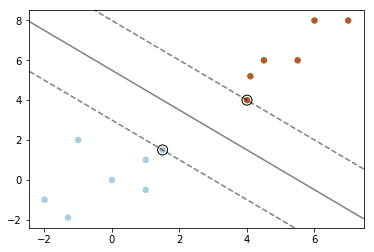

The decision boundary does not change on introducing [-1.3, -1.9], since the datapoint is a close neighbour of the points in   class-1.


In [59]:
class_1 = np.array([[-1,2,1],[1,1,1], [1.5,1.5,1], [-2,-1, 1], [0,0,1], [1, -0.5, 1], [-1.3,-1.9, 1]])
X = np.concatenate((class_1[:,:2], class_2[:,:2]))
y = np.concatenate((class_1[:,2], class_2[:,2]))
svm_cl = SVC(kernel= 'linear')
svm_cl.fit(X, y)

print("The support vectors are: \n", svm_cl.support_vectors_)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_cl.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_cl.support_vectors_[:, 0], svm_cl.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

print("The decision boundary does not change on introducing [-1.3, -1.9], since the datapoint is a close neighbour of the points in   class-1.")

### Perturbation of non-support vectors
**(f) Now perturb all the points in both classes in part (a) except (1.5,1.5) in class0 and (4,4) in class1 as follows. Add -0.5 to each x and y coordinate in Class0 and 0.5 to each point in Class1. Did the decision boundary change?**

The support vectors are: 
 [[1.5 1.5]
 [4.  4. ]]


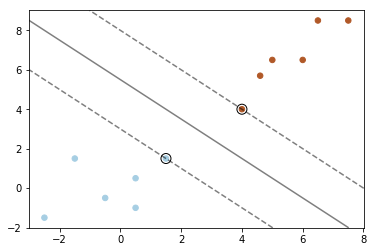

In [61]:
class_1 = np.array([[-1.5,1.5,1],[0.5,0.5,1], [1.5,1.5,1], [-2.5,-1.5, 1], [-0.5,-0.5,1], [0.5, -1, 1]])
class_2 = np.array([[4.6,5.7,2], [6.5,8.5,2], [4,4,2], [7.5,8.5,2], [5,6.5,2],[6,6.5,2]])

X = np.concatenate((class_1[:,:2], class_2[:,:2]))
y = np.concatenate((class_1[:,2], class_2[:,2]))
svm_cl = SVC(kernel= 'linear')
svm_cl.fit(X, y)

print("The support vectors are: \n", svm_cl.support_vectors_)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_cl.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_cl.support_vectors_[:, 0], svm_cl.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**(g) How did the perturbation of points which are not support vectors in (a) affect the final classifier? Did the decision boundary change? Why not?**

The perturbation given didn't change the decision boundary for this particular perturbation adopted as the class-1 and class-2 points are moved away from the original positions in the direction away from the decision region amd hence they don't have any influence on the optimal classifier.

### Question 4  
### Introduction of Kernels
**a) Plot two concentric circles of radii 4 and 8 with origin at 0. Sample 100 points uniformly from each of these circles. (use rcos(theta) and rsin(theta) to find the coordinates of the points lying on the circle. r is the radius of the circle. Vary theta from 3.6 degrees to 360 degrees in intervals of 3.6 degrees.)<br><br>b) Is the data linearly separable? <br><br>c)Since it's not, we will transform them to a different space (with probably different number of dimensions). The transformation (which generally boils down to inner product - something that we call a kernel) will make the data linearly separable in the different space. For each point, compute features as [1, x, x^2,xy,y^2,y]. This transforms the data from 2D to 6D. Now, use sklearn's SVM classifier (linear kernel) to classify the transformed feature space into two classes. <br><br>d)Now apply SVM classifier with i) polynomial kernel with degree 2  ii) rbf kernel and perform the classification. Visualize the decision boundary in the original 2D space in both the cases. Report the accuracies. Which performs best and why?<br>**

(a)


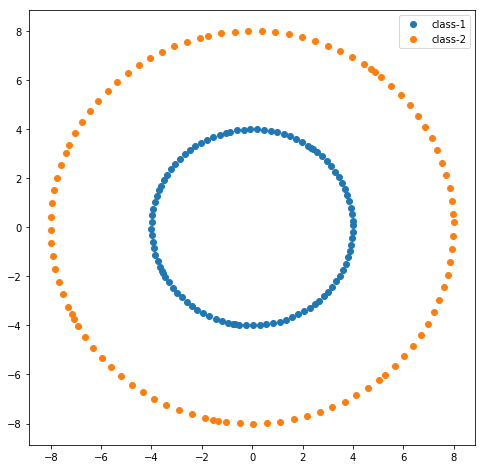


(b)
No, the data is not linearly separable.

(c)
The misclassification error using the built linear classifier on transformed data is:  0
The error above shows that after the transformation the data becomes linearly separable and classifies both classses correctly.

The accuracy obtained using the polynomial kernel is :  1.0


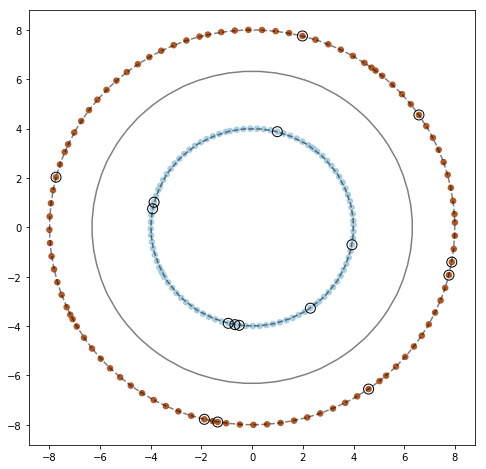

In [107]:
from sklearn.metrics import accuracy_score
# part -(a)
print('(a)')
r1 = 4
r2 = 8
theta = np.arange(3.6, 360, 3.6)
circle_1 = np.transpose(np.array([r1*np.cos(theta), r1*np.sin(theta)]))
circle_2 = np.transpose(np.array([r2*np.cos(theta), r2*np.sin(theta)]))
plt.figure(figsize=(8,8))
plt.scatter( circle_1[:,0], circle_1[:,1], label = 'class-1')
plt.scatter(circle_2[:,0], circle_2[:,1], label = 'class-2')
plt.legend()
plt.show()

# part - (b)
print('\n(b)')
print("No, the data is not linearly separable.")

# part- (c)
print('\n(c)')
# new features
X1 = np.concatenate((circle_1[:,0], circle_2[:,0])) # feature-2
X2 = np.concatenate((circle_1[:,1], circle_2[:,1])) # feature-6
feature_1 = np.array([1]*X1.shape[0])
feature_3 = np.square(X1)
feature_4 = X1 * X2
feature_5 = np.square(X2)

data_new = np.column_stack((feature_1, X1, feature_3, feature_4, feature_5, X2))
Y = np.array([1]*99 + [2]*99)
clf = SVC(kernel= 'linear')
clf.fit(data_new, Y)
y_pred = clf.predict(data_new)
print("The misclassification error using the built linear classifier on transformed data is: ", sum(Y != y_pred))
print("The error above shows that after the transformation the data becomes linearly separable and classifies both classses correctly.")

# part-(d)
X1 = np.concatenate((circle_1, circle_2))
clf_2 = SVC(C=1.0, kernel='poly', degree = 2, gamma = 'auto')
clf_2.fit(X1, Y)
y_pred2 = clf_2.predict(X1)
print("\nThe accuracy obtained using the polynomial kernel is : ", accuracy_score(Y, y_pred2))


# plottin the decision region and support vectors
plt.figure(figsize=(8,8))
plt.scatter(X1[:, 0], X1[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf_2.support_vectors_[:, 0], clf_2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


The accuracy obtained using the polynomial kernel is :  1.0


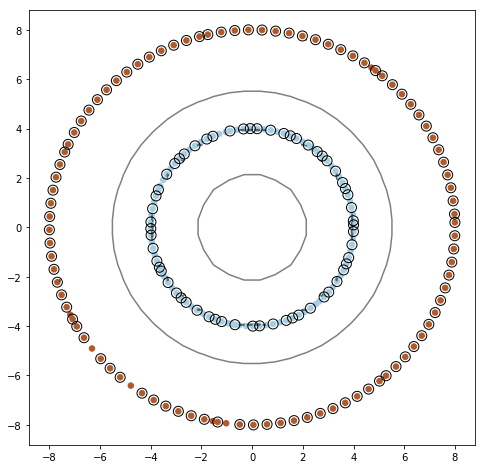

In [108]:
# using rbf kernel
clf_3 = SVC(C = 1.0, kernel= 'rbf', gamma = 'auto')
clf_3.fit(X1,Y)
y_pred3 = clf_3.predict(X1)
print("\nThe accuracy obtained using the polynomial kernel is : ", accuracy_score(Y, y_pred3))

# plotting the decision boundary
plt.figure(figsize=(8,8))
plt.scatter(X1[:, 0], X1[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_3.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf_3.support_vectors_[:, 0], clf_3.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Question 5 
### Visualising effect of kernels
**Load svm_c0.txt and svm_c1.txt. Create labels as 0 and 1 for these correspondingly. Visualise the two classes and plot decision boundaries obtained by the following kernels and corresponding hyperparameters.<br>(a) Linear kernel with C as 1.0 <br>(b) RBF kernel with gamma as [0.1,1.0,10.0,50.0]** 

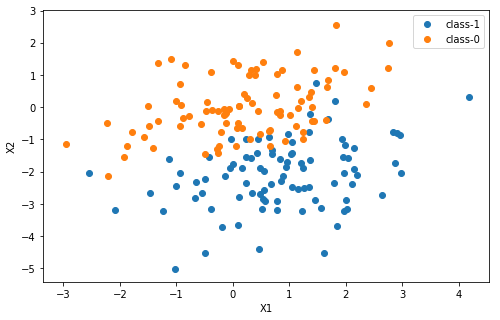

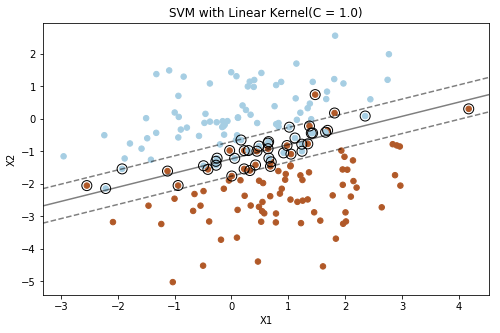

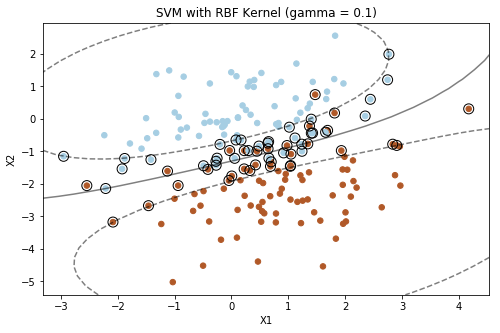

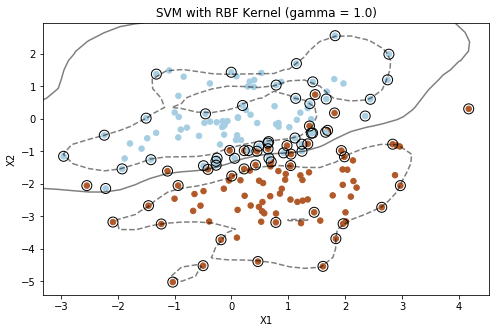

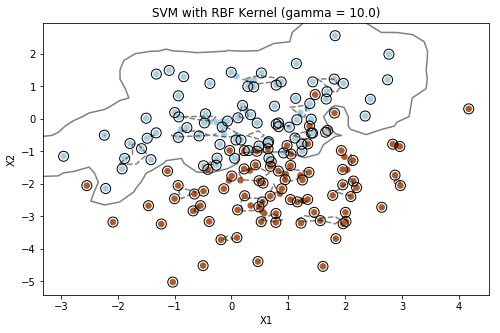

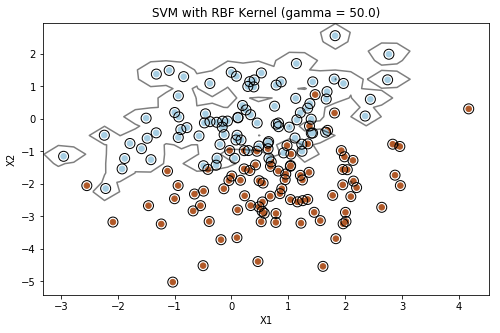

In [128]:
from sklearn.svm import LinearSVC
class_1 = np.genfromtxt('svm_c1.txt')
class_0 = np.genfromtxt('svm_c0.txt')

def decision_curve(classifier , X1, Y, title):
    # plotting the decision boundary
    plt.figure(figsize=(8,5))
    plt.scatter(X1[:, 0], X1[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# visualizing the data given
plt.figure(figsize=(8,5))
plt.scatter(class_1[:,0], class_1[:,1], marker = 'o', label = 'class-1')
plt.scatter(class_0[:,0], class_0[:,1], marker = 'o', label = 'class-0')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

X = np.concatenate((class_1, class_0))
Y = np.array([1]*class_1.shape[0] + [0]*class_0.shape[0])

# linear kernel
lin_clf = SVC(C = 1.0, kernel='linear')
lin_clf.fit(X,Y)
decision_curve(lin_clf, X, Y, 'SVM with Linear Kernel(C = 1.0)')

# rbf kernel
gama = [0.1,1.0,10.0,50.0]
for i in gama:
    kern_clf = SVC(kernel='rbf', gamma= i)
    kern_clf.fit(X,Y)
    decision_curve(kern_clf, X,Y, 'SVM with RBF Kernel (gamma = {})'.format(i))

# Take Home

**Load the Forest Cover Types dataset from sklearn. 1. Use sklearn's SVM function to classify the data. Do hyperparameter tuning using <br><br> a) C = {0.001,0.01,0.1,1,10,100} <br><br> b) kernel = {'linear','poly','rbf','sigmoid'}. For the polynomial kernel, test with degrees 1,2,3,4,5. For the other kernels, test with gamma values of 0.001,0.01,0.1,1,10,100. <br><br> To do the above exercise of hyperparameter tuning, use the cross validation function in sklearn. Do not perform each experiment separately. <br><br> c) Report the accuracies (F1 scores) of the 5 best cases in a tabular form. <br><br>  d) Plot the confusion matrices of the best 5 cases.<br> e) Comment on the significance of each hyperparameter. <br><br> 2. a) Use sklearn's logistic regression, KNN and Naive Bayes to classify the above dataset. Report the F1 scores and confusion matrices in each case. <br> b) Arrange the 4 classifiers (LR, NB, SVM, KNN) in the decreasing order of F1 scores. Comment on which classifier performs best and why.**

In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import GridSearchCV
data = fetch_covtype()
X = data['data']
Y = data['target']
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.001,0.01,0.1,1,10,100], 'degree':[1,2,3,4,5], 'gamma':[0.001,0.01,0.1,1,10,100]}
svc_clf = SVC(C =1.0, gamma = 'scale')
clf = GridSearchCV(svc_clf, parameters, cv = 5)
clf.fit(X, Y)

import sklearn.datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
forest = sklearn.datasets.fetch_covtype
X = forest()
x = X['data']
y = X['target']
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
D = np.zeros((np.shape(x)[0],np.shape(x)[1]+1))
D[:,0:np.shape(x)[1]] = x
D[:,np.shape(x)[1]] = y
np.random.seed(4)
np.random.shuffle(D)
tuning_parameters = [{'kernel' : ['linear'],'C' : [0.001,0.01,0.1,1,10,100]}]
clf = GridSearchCV(SVC(),tuning_parameters,cv = 2,scoring = 'f1_macro')
clf.fit(D[0:3000,0:np.shape(x)[1]],D[0:3000,np.shape(x)[1]])
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

tuning_parameters = [{'kernel' : ['linear','rbf','sigmoid'],'C' : [0.001,0.01,0.1,1,10,100],'gamma' : [0.001,0.01,0.1,1,10,100]},{'kernel':['poly'],'C' : [0.001,0.01,0.1,1,10,100],'degree':[1,2,3,4,5]}]
clf = GridSearchCV(SVC(),tuning_parameters,cv = 2,scoring = 'f1_macro')
clf.fit(D[0:1000,0:np.shape(x)[1]],D[0:1000,np.shape(x)[1]])
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
log = LogisticRegression(solver = "liblinear",multi_class = 'ovr')
knn = KNeighborsClassifier()
gnb = GaussianNB()
log.fit(D[0:2400,0:np.shape(x)[1]],D[0:2400,np.shape(x)[1]])
knn.fit(D[0:2400,0:np.shape(x)[1]],D[0:2400,np.shape(x)[1]])
gnb.fit(D[0:2400,0:np.shape(x)[1]],D[0:2400,np.shape(x)[1]])
pred_log = log.predict(D[2400:3000,0:np.shape(x)[1]])
pred_knn = knn.predict(D[2400:3000,0:np.shape(x)[1]])
pred_gnb = gnb.predict(D[2400:3000,0:np.shape(x)[1]])
f1_log = f1_score(D[2400:3000,np.shape(x)[1]],pred_log, average = 'macro')
f1_knn = f1_score(D[2400:3000,np.shape(x)[1]],pred_knn, average = 'macro')
f1_gnb = f1_score(D[2400:3000,np.shape(x)[1]],pred_gnb, average = 'macro')